## Probabilistic Learning on Manifolds (Simple example in 20 dimensions)

In this example, raw invented data is used as sample input. This is just a user guide to see how the package and algorithm work and see their possible applications.

The input sample included 300 data points and each features a unique vector of some independent variables and some other linearly related variables. The goal is to use PLoM learn the data structure and generate more samples whose key statistics (i.e., mean and covariance) are consistent with the input sample.

### Import python modules

In [1]:
import numpy as np
import random
import time
from math import pi
import pandas as pd
from ctypes import *
%matplotlib notebook
import matplotlib.pyplot as plt
import sys

### Import PLoM modules

In [2]:
sys.path.insert(1, '../../')
from PLoM import *

### Load Data
Data are loaded via a comma-separate value (csv) file. The first row contains column names for all the variables. The following rows are input sample data. Users are expected to specif the csv filename.

2021-09-23 18:32:29.032010  RUNNING-MSG --NEW LOG STARTING FROM THIS LINE-- 
2021-09-23 18:32:29.032851  RUNNING-MSG PLoM: Running directory /home/javigual/Documents/PLoM/Example0 initialized. 
2021-09-23 18:32:29.075085  RUNNING-MSG PLoM: database server initialized. 
2021-09-23 18:32:29.075579  RUNNING-MSG PLoM: visualization folder /home/javigual/Documents/PLoM/Example0/FigOut initialized. 
2021-09-23 18:32:29.082886  RUNNING-MSG PLoM.load_data: loaded data size = (300, 20). 
2021-09-23 18:32:29.114719  RUNNING-MSG PLoM.initialize_data: current X0 size = (300, 20). 
2021-09-23 18:32:29.115245  RUNNING-MSG PLoM.initialize_data: X0 and X0_size saved to database. 


<IPython.core.display.Javascript object>


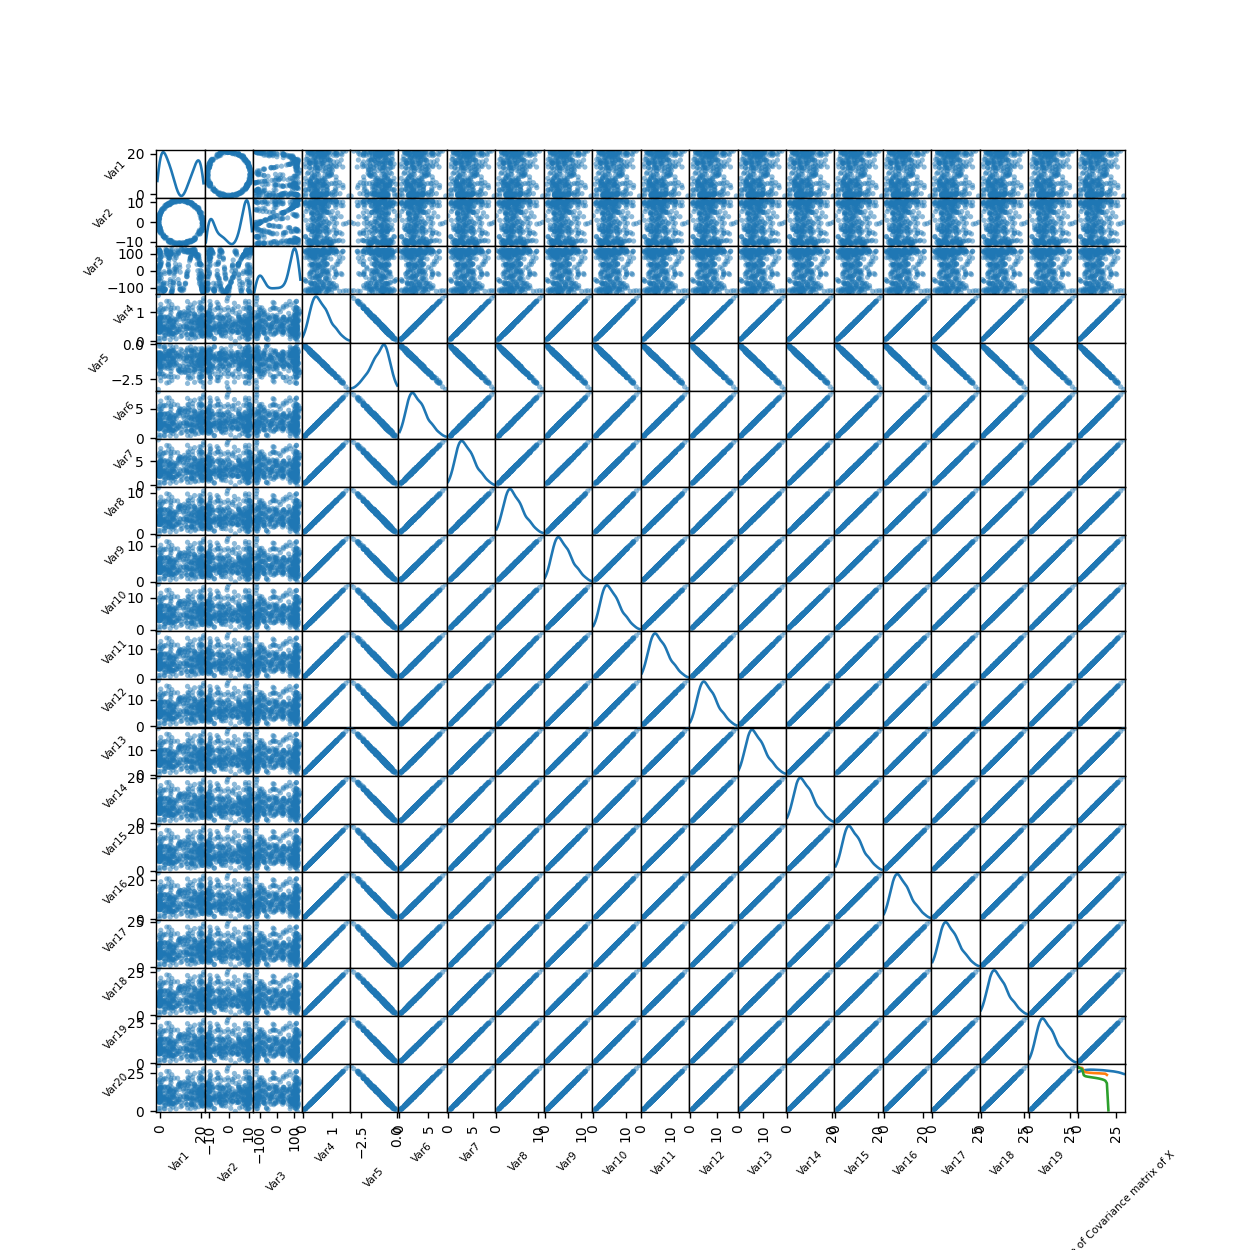

2021-09-23 18:32:42.942796  RUNNING-MSG PLoM: ScatterMatrix_X0.png saved in /home/javigual/Documents/PLoM/Example0/FigOut. 
2021-09-23 18:32:42.943562  WARNING-MSG PLoM.add_constraints: no user-defined constraint - please use add_constraints(constraints_file=X) to add new constraints if any. 
2021-09-23 18:32:42.944092  RUNNING-MSG PLoM: using RunAlgorithm(n_mc=n_mc,epsilon_pca=epsilon_pca,epsilon_kde) to run simulations. 


In [3]:
# Filename
filename = './data/data_example20D.csv'
model = PLoM(model_name='Example0', data=filename, col_header=True, plot_tag=True)

### Configuring tasks
Please specify tasks to run - the list of tasks can be run in sqeunce or invidivdual tasks can be run separately.

In [4]:
tasks = ['DataNormalization','RunPCA','RunKDE','ISDEGeneration']

### Step 0: Scaling the data

In [5]:
# Configure the task
model.ConfigTasks(['DataNormalization'])
# Launch the run
model.RunAlgorithm()

2021-09-23 18:32:51.205224  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: DataNormalization. 
2021-09-23 18:32:51.206780  RUNNING-MSG PLoM.RunAlgorithm: data normalization completed. 
2021-09-23 18:32:51.244708  RUNNING-MSG PLoM.RunAlgorithm: X_range, X_min, X_scaled and X_scaled_mean saved. 
2021-09-23 18:32:51.274755  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) DataNormalization done. 


### Step 1: Principal Component Analysis (PCA)

2021-09-23 18:32:52.722402  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunPCA. 
2021-09-23 18:32:52.730309  RUNNING-MSG PLoM.RunPCA: considered number of PCA components = 19 


<IPython.core.display.Javascript object>


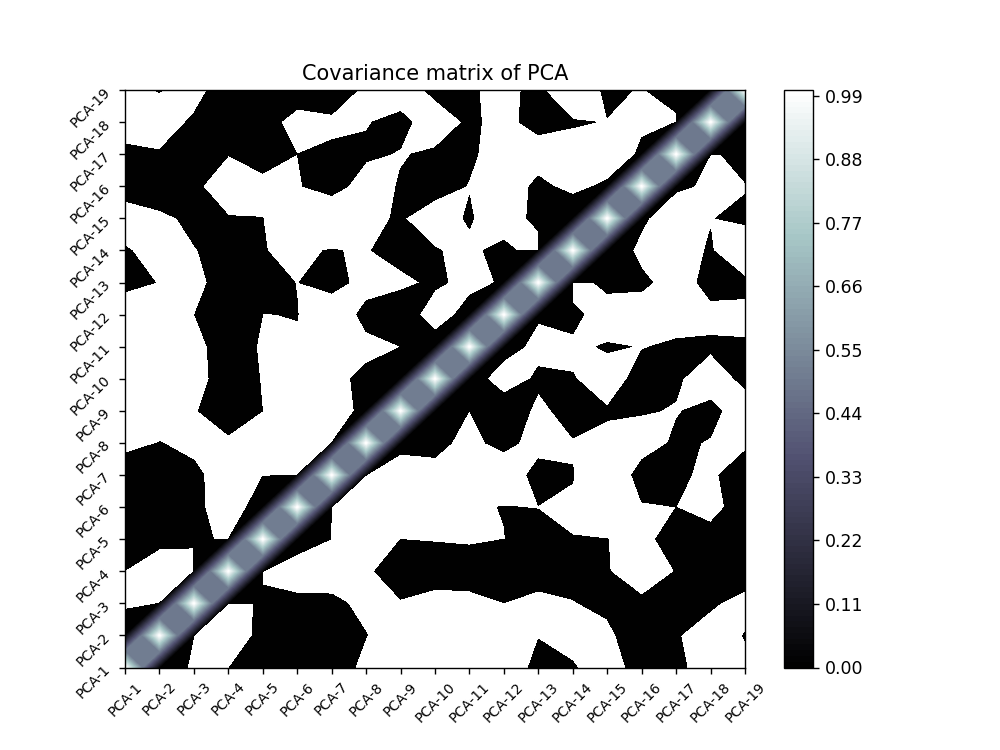

2021-09-23 18:32:53.633273  RUNNING-MSG PLoM: PCA_CovarianceMatrix.png saved in /home/javigual/Documents/PLoM/Example0/FigOut. 
2021-09-23 18:32:53.635099  RUNNING-MSG PLoM.RunAlgorithm: PCA completed. 
2021-09-23 18:32:53.684141  RUNNING-MSG PLoM.RunAlgorithm: X_PCA, EigenValue_PCA and EigenVector_PCA saved. 
2021-09-23 18:32:53.763275  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunPCA done. 


In [6]:
# Tolerance for truncating principal components
tol_pca = 1e-6
# Configure the task
model.ConfigTasks(['RunPCA'])
# Launch the run
model.RunAlgorithm(epsilon_pca=tol_pca)

### Step 2: Kernel Density Estimation (KDE)

In this step there is an optional argument for the RunAlgorithm process that involves the diffusion maps basis. This step can both be run or not, anddepending on the requirements it can be neglected. It can be noted that the default value of *runDiffMaps* is *True*.

2021-09-23 18:33:03.603821  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: RunKDE. 
2021-09-23 18:33:04.126899  RUNNING-MSG PLoM.RunAlgorithm: kernel density estimation completed. 
2021-09-23 18:33:04.179076  RUNNING-MSG PLoM.RunAlgorithm: KDE, X_KDE and EigenValues_KDE saved. 


<IPython.core.display.Javascript object>


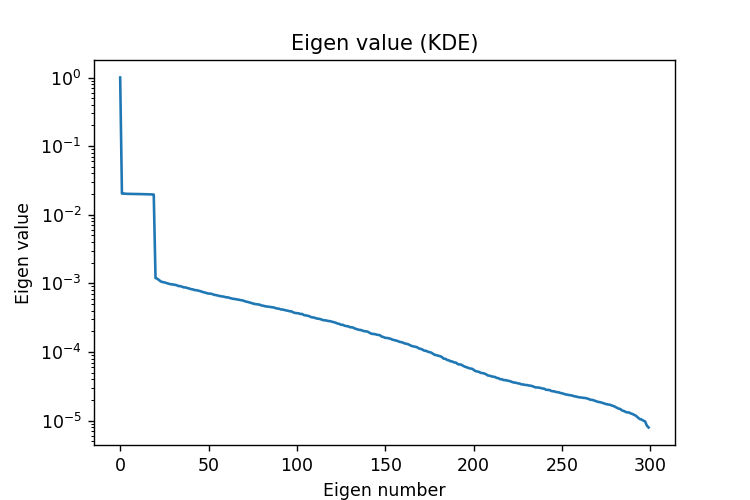

2021-09-23 18:33:04.941088  RUNNING-MSG PLoM: KDE_EigenValue.png saved in /home/javigual/Documents/PLoM/Example0/FigOut. 
2021-09-23 18:33:04.941471  RUNNING-MSG PLoM.RunAlgorithm: diffusion maps completed. 
2021-09-23 18:33:04.980628  RUNNING-MSG PLoM.RunAlgorithm: KDE_g, KDE_m, KDE_a and KDE_Z saved. 
2021-09-23 18:33:05.165641  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) RunKDE done. 


In [7]:
# Smoothing parameter in the KDE
sp = 25
# Configure the task
model.ConfigTasks(['RunKDE'])

# Launch the run
model.RunAlgorithm(epsilon_kde=sp)

### Step 3: Create the generator

In [8]:
# Extra parameters for ISDE generation
new_sample_num_ratio = 10
tol_PCA2 = 1e-5
# Configure the task
model.ConfigTasks(['ISDEGeneration'])
# Launch the run
model.RunAlgorithm(n_mc = new_sample_num_ratio, tol_PCA2 = tol_PCA2)

2021-09-23 18:33:14.983036  RUNNING-MSG PLoM.config_tasks: the following tasks is configured to run: ISDEGeneration. 
delta t:  0.18478391103145078
2021-09-23 18:33:19.525831  RUNNING-MSG PLoM.ISDEGeneration: new generations are simulated. 
2021-09-23 18:33:19.541041  RUNNING-MSG PLoM.RunAlgorithm: Realizations generated. 
2021-09-23 18:33:19.556204  RUNNING-MSG PLoM.RunAlgorithm: X_new saved. 
2021-09-23 18:33:19.618092  RUNNING-MSG PLoM.RunAlgorithm: simulation completed with task(s) ISDEGeneration done. 


### Step 4: Exporting data

In [9]:
# Available data list
model.export_results()

2021-09-23 18:33:19.650532  RUNNING-MSG PLoM.export_results: available data /DS_EigenValue_PCA,/DS_EigenValues_KDE,/DS_EigenVector_PCA,/DS_Errors,/DS_KDE_Z,/DS_KDE_a,/DS_KDE_g,/DS_KDE_m,/DS_N,/DS_NumComp_PCA,/DS_X0,/DS_X_KDE,/DS_X_PCA,/DS_X_min,/DS_X_new,/DS_X_range,/DS_X_scaled,/DS_X_scaled_mean,/DS_c_v,/DS_hat_s_v,/DS_n,/DS_s_v,/EigenValue_PCA,/EigenValues_KDE,/EigenVector_PCA,/Errors,/KDE_Z,/KDE_a,/KDE_g,/KDE_m,/N,/NumComp_PCA,/X0,/X_KDE,/X_PCA,/X_min,/X_new,/X_range,/X_scaled,/X_scaled_mean,/basic,/c_v,/constraints_file,/hat_s_v,/n,/s_v. 


In [10]:
# Pick up the original and new realizations, X0 and X_new
model.export_results(data_list=['/X0','/X_new'], file_format_list=['csv','csv'])

2021-09-23 18:33:19.712928  RUNNING-MSG PLoM.export_results: /X0 is exported in /home/javigual/Documents/PLoM/Example0/DataOut/X0.csv. 
2021-09-23 18:33:19.803853  RUNNING-MSG PLoM.export_results: /X_new is exported in /home/javigual/Documents/PLoM/Example0/DataOut/X_new.csv. 


### Post-processing
We would like to check the basic statistics of the input sample (i.e., MSA) and the generated new realizations by PLoM. The key metrics include the median, standard deviation, and correlation coefficient matrix of different structural responses.

In [11]:
# Load results

#write realtive paths

df_msa = pd.read_csv('/home/javigual/Documents/PLoM/Example0/DataOut/X0.csv')
df_plom = pd.read_csv('/home/javigual/Documents/PLoM/Example0/DataOut/X_new.csv')
print(df_msa.head)
print(df_plom.head)

<bound method NDFrame.head of      Unnamed: 0       Var1       Var2        Var3      Var4      Var5  \
0             0  16.805187  -9.030051  127.664233  0.931982 -1.832991   
1             1  13.248262  10.235868  114.810444  0.431576 -0.902791   
2             2  15.471630   9.770788  121.172821  0.262776 -0.608559   
3             3  13.155974  -9.856282  -17.549627  0.230514 -0.474090   
4             4   5.083361   9.260483  -61.753186  0.746545 -1.491888   
..          ...        ...        ...         ...       ...       ...   
295         295  20.498631   1.915178  -40.365353  0.359852 -0.819206   
296         296  13.277776  10.478213  120.027958  0.601077 -1.168281   
297         297   2.276239   8.325455   91.974155  0.204629 -0.317934   
298         298   6.493595  10.436618  -70.223598  0.260169 -0.439710   
299         299  -0.817857   0.317960 -103.164885  0.490878 -0.890169   

         Var6      Var7      Var8      Var9  ...     Var11      Var12  \
0    4.642449  5.572

In [ ]:
# Maximum story drift ratio in the building
# Note: the SDR are in the rows # 4 ~ # 15
sa_msa = df_msa['Sa']
sa_plom = df_plom['Sa']
col_list = ['SDR'+str(x+1) for x in range(12)]
sdr_max_msa = np.max(df_msa[col_list], axis=1)
sdr_max_plom = np.max(df_plom[col_list], axis=1)

In [ ]:
iml = [0.1690, 0.2594, 0.3696, 0.5492, 0.7131, 0.9000]
sdr_max_med_msa = [np.exp(np.mean(np.log(sdr_max_msa[df_msa['Sa']==iml_x]))) for iml_x in iml]
sdr_max_std_msa = [np.std(np.log(sdr_max_msa[df_msa['Sa']==iml_x])) for iml_x in iml]

iml2 = np.linspace(np.min(iml),np.max(iml),500)
num_nb = 100
sdr_max_med_plom = [np.exp(np.mean(np.log(sdr_max_plom[abs(np.log(df_plom['Sa'])-np.log(iml_x)).argsort()[0:num_nb]]))) for iml_x in iml2]
sdr_max_std_plom = [np.std(np.log(sdr_max_plom[abs(np.log(df_plom['Sa'])-np.log(iml_x)).argsort()[0:num_nb]])) for iml_x in iml2]

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(sdr_max_plom, sa_plom, 'bo', alpha=0.1, label='PLoM')
ax.plot(sdr_max_msa, sa_msa, 'ks', label='MSA')
ax.plot(sdr_max_med_msa, iml, 'k-', label='MSA median')
ax.plot(sdr_max_med_plom, iml2, 'r-', label='PLoM moving median')
ax.plot(sdr_max_med_msa*np.exp(sdr_max_std_msa), iml, 'k--', label='MSA $\pm$1$\sigma$')
ax.plot(sdr_max_med_plom*np.exp(sdr_max_std_plom), iml2, 'r:', label='PLoM moving $\pm$1$\sigma$')
ax.plot(sdr_max_med_msa/np.exp(sdr_max_std_msa), iml, 'k--')
ax.plot(sdr_max_med_plom/np.exp(sdr_max_std_plom), iml2, 'r:')

ax.set_xlabel('Max. SDR (in/in)')
ax.set_ylabel('Sa (g)')
ax.legend()
ax.grid()
plt.show()

In [ ]:
# Peak story acceleration in the building
# Note: the PFA are in the rows # 16 ~ # 27
col_list = ['PFA'+str(x+1) for x in range(12)]
pfa_max_msa = np.max(df_msa[col_list], axis=1)
pfa_max_plom = np.max(df_plom[col_list], axis=1)

iml = [0.1690, 0.2594, 0.3696, 0.5492, 0.7131, 0.9000]
pfa_max_med_msa = [np.exp(np.mean(np.log(pfa_max_msa[sa_msa==iml_x]))) for iml_x in iml]
pfa_max_std_msa = [np.std(np.log(pfa_max_msa[sa_msa==iml_x])) for iml_x in iml]

iml2 = np.linspace(np.min(iml),np.max(iml),500)
num_nb = 100
pfa_max_med_plom = [np.exp(np.mean(np.log(pfa_max_plom[abs(np.log(df_plom['Sa'])-np.log(iml_x)).argsort()[0:num_nb]]))) for iml_x in iml2]
pfa_max_std_plom = [np.std(np.log(pfa_max_plom[abs(np.log(df_plom['Sa'])-np.log(iml_x)).argsort()[0:num_nb]])) for iml_x in iml2]

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(pfa_max_plom, sa_plom, 'bo', alpha=0.1, label='PLoM')
ax.plot(pfa_max_msa, sa_msa, 'ks', label='MSA')
ax.plot(pfa_max_med_msa, iml, 'k-', label='MSA median')
ax.plot(pfa_max_med_plom, iml2, 'r-', label='PLoM moving median')
ax.plot(pfa_max_med_msa*np.exp(pfa_max_std_msa), iml, 'k--', label='MSA $\pm$1$\sigma$')
ax.plot(pfa_max_med_plom*np.exp(pfa_max_std_plom), iml2, 'r:', label='PLoM moving $\pm$1$\sigma$')
ax.plot(pfa_max_med_msa/np.exp(pfa_max_std_msa), iml, 'k--')
ax.plot(pfa_max_med_plom/np.exp(pfa_max_std_plom), iml2, 'r:')

ax.set_xlabel('Max. PFA (g)')
ax.set_ylabel('Sa (g)')
ax.legend()
ax.grid()
plt.show()

In [ ]:
# Story-based responses (SDR)
x0 = df_msa.iloc[:,1:].T
x_c = df_plom.iloc[:,1:].T
sa_msa = x0.iloc[0,:]
sa_plom = x_c.iloc[0,:]
iml = [0.1690, 0.2594, 0.3696, 0.5492, 0.7131, 0.9000]
for i in range(12):
    sdr_cur_msa = x0.iloc[i+3,:]
    sdr_cur_plom = x_c.iloc[i+3,:]
    sdr_cur_med_msa = [np.exp(np.mean(np.log(sdr_cur_msa[x0.iloc[0,:]==iml_x]))) for iml_x in iml]
    sdr_cur_std_msa = [np.std(np.log(sdr_cur_msa[x0.iloc[0,:]==iml_x])) for iml_x in iml]

    iml2 = iml
    num_nb = 100
    sdr_cur_med_plom = [np.exp(np.mean(np.log(sdr_cur_plom[abs(np.log(x_c.iloc[0,:])-np.log(iml_x)).argsort()[0:num_nb]]))) for iml_x in iml2]
    sdr_cur_std_plom = [np.std(np.log(sdr_cur_plom[abs(np.log(x_c.iloc[0,:])-np.log(iml_x)).argsort()[0:num_nb]])) for iml_x in iml2]
    
    plt.figure(figsize=(16,4))
    for j in range(6):
        plt.subplot(1,6,j+1)
        ax = plt.gca()
        pd.Series(sdr_cur_plom).plot.kde(color='b', bw_method=0.5)
        pd.Series(sdr_cur_msa).plot.kde(color='k', bw_method=0.5)
        ax.plot([sdr_cur_med_msa[j], sdr_cur_med_msa[j]], [0, 100], 'k-')
        ax.plot([sdr_cur_med_msa[j]*np.exp(sdr_cur_std_msa[j]), sdr_cur_med_msa[j]*np.exp(sdr_cur_std_msa[j])], [0, 100], 'k--')
        ax.plot([sdr_cur_med_msa[j]/np.exp(sdr_cur_std_msa[j]), sdr_cur_med_msa[j]/np.exp(sdr_cur_std_msa[j])], [0, 100], 'k--')
        ax.plot([sdr_cur_med_plom[j], sdr_cur_med_plom[j]], [0, 100], 'b-')
        ax.plot([sdr_cur_med_plom[j]*np.exp(sdr_cur_std_plom[j]), sdr_cur_med_plom[j]*np.exp(sdr_cur_std_plom[j])], [0, 100], 'b--')
        ax.plot([sdr_cur_med_plom[j]/np.exp(sdr_cur_std_plom[j]), sdr_cur_med_plom[j]/np.exp(sdr_cur_std_plom[j])], [0, 100], 'b--')
        ax.set_xlim(0.0, 0.05)
        #ax.set_ylim(0.0, 200)
        ax.grid()
        ax.set_xlabel('SDR (in/in)')
        if j > 0:
            ax.set_yticklabels('')
            ax.set_ylabel('')
        if j == 2:
            ax.set_title('Max. SDR (in/in) of Story #'+str(i+1))

In [ ]:
# Story-based responses (PFA)
iml = [0.1690, 0.2594, 0.3696, 0.5492, 0.7131, 0.9000]
for i in range(12):
    pfa_cur_msa = x0.iloc[i+15,:]
    pfa_cur_plom = x_c.iloc[i+15,:]
    pfa_cur_med_msa = [np.exp(np.mean(np.log(pfa_cur_msa[x0.iloc[0,:]==iml_x]))) for iml_x in iml]
    pfa_cur_std_msa = [np.std(np.log(pfa_cur_msa[x0.iloc[0,:]==iml_x])) for iml_x in iml]

    iml2 = iml
    num_nb = 100
    pfa_cur_med_plom = [np.exp(np.mean(np.log(pfa_cur_plom[abs(np.log(x_c.iloc[0,:])-np.log(iml_x)).argsort()[0:num_nb]]))) for iml_x in iml2]
    pfa_cur_std_plom = [np.std(np.log(pfa_cur_plom[abs(np.log(x_c.iloc[0,:])-np.log(iml_x)).argsort()[0:num_nb]])) for iml_x in iml2]
    
    plt.figure(figsize=(16,4))
    for j in range(6):
        plt.subplot(1,6,j+1)
        ax = plt.gca()
        pd.Series(pfa_cur_plom).plot.kde(color='b', bw_method=0.5)
        pd.Series(pfa_cur_msa).plot.kde(color='k', bw_method=0.5)
        ax.plot([pfa_cur_med_msa[j], pfa_cur_med_msa[j]], [0, 100], 'k-')
        ax.plot([pfa_cur_med_msa[j]*np.exp(pfa_cur_std_msa[j]), pfa_cur_med_msa[j]*np.exp(pfa_cur_std_msa[j])], [0, 100], 'k--')
        ax.plot([pfa_cur_med_msa[j]/np.exp(pfa_cur_std_msa[j]), pfa_cur_med_msa[j]/np.exp(pfa_cur_std_msa[j])], [0, 100], 'k--')
        ax.plot([pfa_cur_med_plom[j], pfa_cur_med_plom[j]], [0, 100], 'b-')
        ax.plot([pfa_cur_med_plom[j]*np.exp(pfa_cur_std_plom[j]), pfa_cur_med_plom[j]*np.exp(pfa_cur_std_plom[j])], [0, 100], 'b--')
        ax.plot([pfa_cur_med_plom[j]/np.exp(pfa_cur_std_plom[j]), pfa_cur_med_plom[j]/np.exp(pfa_cur_std_plom[j])], [0, 100], 'b--')
        ax.set_xlim(0.0, 1)
        ax.set_ylim(0.0, 10)
        ax.grid()
        ax.set_xlabel('PFA (g)')
        if j > 0:
            ax.set_yticklabels('')
            ax.set_ylabel('')
        if j == 2:
            ax.set_title('PFA (g) of Story #'+str(i+1))

In [ ]:
# Correlation coefficient matrix
c_msa = np.corrcoef(x0)
c_plom = np.corrcoef(x_c)
c_combine = c_msa
tmp = np.triu(c_plom).flatten()
tmp = tmp[tmp != 0]
c_combine[np.triu_indices(27)] = tmp

# Plot covariance matrix
fig, ax = plt.subplots(figsize=(8,6))
ctp = ax.contourf(c_combine[3:,3:], cmap=plt.cm.hot, levels=1000)
ctp.set_clim(0,1)
ax.plot([0, 23], [0, 23], 'k--')
ax.set_xticks(list(range(24)))
ax.set_yticks(list(range(24)))
ax.set_xticklabels(x0.index.tolist()[3:], fontsize=8, rotation=45)
ax.set_yticklabels(x0.index.tolist()[3:], fontsize=8, rotation=45)
ax.set_title('Covariance matrix comparison')
ax.grid()
cbar = fig.colorbar(ctp,ticks=[x/10 for x in range(11)])
plt.show()

# Plot the cross-section of correlation matrix
fig, ax = plt.subplots(figsize=(6,4))
ax.plot([0],[0],'k-',label='MSA')
ax.plot([0],[0],'r:',label='PLoM')
for i in range(24):
    ax.plot(np.array(range(24)),c_msa[i+3][3:],'k-')
    ax.plot(np.array(range(24)),c_plom[i+3][3:],'r:')
ax.set_xticks(list(range(24)))
ax.set_xticklabels(x0.index.tolist()[3:], fontsize=8, rotation=45)
ax.set_ylabel('Correlation coefficient')
ax.set_ylim([0,1])
ax.set_xlim([0,23])
ax.legend()
ax.grid()
plt.show()